# IE582-HOMEWORK 1 
# Mert IŞIK
# 2019702075

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson

In [2]:
df1 = pd.read_csv('D:\\Dersler\\IE 582\\HW1\\E0 2020-2021.csv')
df2 = pd.read_csv('D:\\Dersler\\IE 582\\HW1\\E0 2019-2020.csv')
df3 = pd.read_csv('D:\\Dersler\\IE 582\\HW1\\E0 2018-2019.csv')

# TASK 1

In [3]:
df_main = pd.concat([df1, df2,df3], join="inner",ignore_index=True) 
#some columns are not included in another seasons, so inner join should be used.
df_main['FTHG-FTAG'] = df_main['FTHG'] - df_main['FTAG']  #adding new column: difference between home and away goals 


In [4]:
mean_home = df_main['FTHG'].mean(axis=0) ##mean of home goal score
prob_home_score =[]
for i in range (0,9):
    prob = poisson.pmf(i, mean_home)
    prob_home_score.append(prob)
exp_home_score = (np.array(prob_home_score) * len(df_main)) // 1 #deleting decimals
df_real=pd.DataFrame(df_main['FTHG'].value_counts())
df_real=df_real.sort_index()
df_real['Expected #Goal'] = pd.Series(exp_home_score, index=df_real.index)
print(df_real)

   FTHG  Expected #Goal
0   193           177.0
1   260           273.0
2   208           210.0
3   101           107.0
4    44            41.0
5    17            12.0
6     3             3.0
7     1             0.0
8     1             0.0


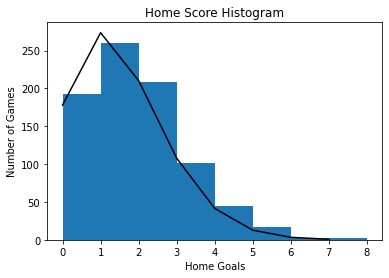

In [5]:
plt.hist(df_main.FTHG, bins=np.arange(min(df_main.FTHG), max(df_main.FTHG)+1, 1))
plt.title('Home Score Histogram')
plt.xlabel('Home Goals')
plt.ylabel('Number of Games')
x = np.arange(min(df_main['FTHG']),max(df_main['FTHG']),1)
plt.plot(x, len(df_main)*poisson.pmf(x,mean_home),color='black')
plt.show()

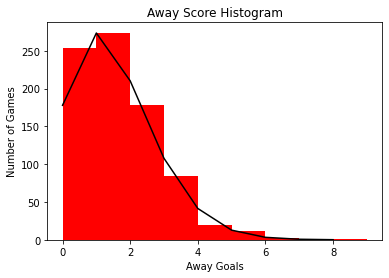

In [6]:
plt.hist(df_main.FTAG, bins=np.arange(min(df_main.FTAG), max(df_main.FTAG)+1, 1), color='red')
plt.title('Away Score Histogram')
plt.xlabel('Away Goals')
plt.ylabel('Number of Games')
x = np.arange(min(df_main['FTAG']),max(df_main['FTAG']),1)
plt.plot(x, len(df_main)*poisson.pmf(x,mean_home),color='black')
plt.show()

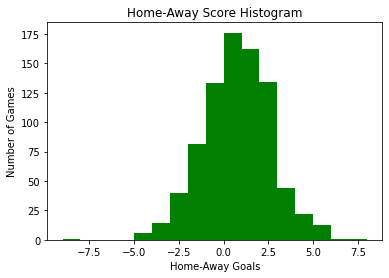

In [7]:
plt.hist(df_main.FTHG-df_main.FTAG, bins=np.arange(min(df_main.FTHG-df_main.FTAG), max(df_main.FTHG-df_main.FTAG)+1, 1), color='green')
plt.title('Home-Away Score Histogram')
plt.xlabel('Home-Away Goals')
plt.ylabel('Number of Games')
x = np.arange(min(df_main['FTHG']-df_main['FTAG']),max(df_main['FTHG']-df_main['FTAG']),1)

Home goal and Away goal histograms are fitting to poisson distribution. However, Home-Away Score histogram are fitting to normal distribution approximately as expected

# TASK 2

Bet365, BetAndWin, Pinnacle and another bookmaker which is coded as 'WH' are chosen as examples of bookmakers.

Task 2.1

In [8]:
#Bet365
df_main['B365PrH'] = 1 / df_main['B365H']
df_main['B365PrA'] = 1 / df_main['B365A']
df_main['B365PrD'] = 1 / df_main['B365D']
df_main['B365PrSum'] = df_main['B365PrD'] + df_main['B365PrA'] + df_main['B365PrH']
#BetAndWin
df_main['BWPrH'] = 1 / df_main['BWH']
df_main['BWPrA'] = 1 / df_main['BWA']
df_main['BWPrD'] = 1 / df_main['BWD']
df_main['BWPrSum'] = df_main['BWPrD'] + df_main['BWPrA'] + df_main['BWPrH']
#Pinnacle
df_main['PSPrH'] = 1 / df_main['PSH']
df_main['PSPrA'] = 1 / df_main['PSA']
df_main['PSPrD'] = 1 / df_main['PSD']
df_main['PSPrSum'] = df_main['PSPrD'] + df_main['PSPrA'] + df_main['PSPrH']
#WH
df_main['WHPrH'] = 1 / df_main['WHH']
df_main['WHPrA'] = 1 / df_main['WHA']
df_main['WHPrD'] = 1 / df_main['WHD']
df_main['WHPrSum'] = df_main['WHPrD'] + df_main['WHPrA'] + df_main['WHPrH']

Task 2.2

In [9]:
#Normalization
#Bet365
df_main['B365PrH_Norm'] = df_main['B365PrH'] / df_main['B365PrSum']
df_main['B365PrA_Norm'] = df_main['B365PrA'] / df_main['B365PrSum']
df_main['B365PrD_Norm'] = df_main['B365PrD'] / df_main['B365PrSum']
#BetAndWin
df_main['BWPrH_Norm'] = df_main['BWPrH'] / df_main['BWPrSum']
df_main['BWPrA_Norm'] = df_main['BWPrA'] / df_main['BWPrSum']
df_main['BWPrD_Norm'] = df_main['BWPrD'] / df_main['BWPrSum']
#Pinnacle
df_main['PSPrH_Norm'] = df_main['PSPrH'] / df_main['PSPrSum']
df_main['PSPrA_Norm'] = df_main['PSPrA'] / df_main['PSPrSum']
df_main['PSPrD_Norm'] = df_main['PSPrD'] / df_main['PSPrSum']
#WH
df_main['WHPrH_Norm'] = df_main['WHPrH'] / df_main['WHPrSum']
df_main['WHPrA_Norm'] = df_main['WHPrA'] / df_main['WHPrSum']
df_main['WHPrD_Norm'] = df_main['WHPrD'] / df_main['WHPrSum']
#Differences
df_main['PrDifB365'] = df_main['B365PrH_Norm'] - df_main['B365PrA_Norm']
df_main['PrDifBW']   = df_main['BWPrH_Norm']   - df_main['BWPrA_Norm']
df_main['PrDifPS'] = df_main['PSPrH_Norm']   - df_main['PSPrA_Norm']
df_main['PrDifWH'] = df_main['WHPrH_Norm']   - df_main['WHPrA_Norm'] 

Task 2.3

In [10]:
draw_matches = df_main[df_main.FTHG == df_main.FTAG ]
draw_matches = draw_matches.reset_index(drop=True)

In [11]:
## probabilities of 4 chosen bookmakers are added in one column as a vector.
combined_draw = pd.concat([draw_matches['PrDifB365'],draw_matches['PrDifBW'],draw_matches['PrDifPS'],draw_matches['PrDifWH']],ignore_index=True)
combined_draw_df = pd.DataFrame({'ProbDif': combined_draw})

combined_all_dif = pd.concat([df_main['PrDifB365'],df_main['PrDifBW'],df_main['PrDifPS'],df_main['PrDifWH']],ignore_index=True)
combined_all_draw = pd.concat([df_main['B365PrD_Norm'],df_main['BWPrD_Norm'],df_main['PSPrD_Norm'],df_main['WHPrD_Norm']],ignore_index=True)
combined_all_df = pd.DataFrame({'ProbDif': combined_all_dif, 'ProbDraw': combined_all_draw})

In [12]:
num_combined_all = np.histogram(combined_all_df['ProbDif'], bins=np.arange(-1, 1.2, 0.2))[0]
num_combined_actual = np.histogram(combined_draw_df['ProbDif'], bins=np.arange(-1, 1.2, 0.2))[0]
#num_combined_all shows that all matches with respect to bins
#num_combined_actual shows that matches which are ended as draw with respect to bins
for j in range(len(num_combined_all)):
    if num_combined_all[j]==0:
        num_combined_all[j]=1 #If there is no match in any bins, program will give error. 0/0 will transform to 0/1.
prob_com_act_draw = num_combined_actual / num_combined_all

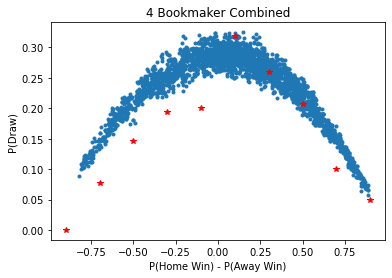

In [13]:
plt.plot(combined_all_df['ProbDif'],combined_all_df['ProbDraw'], '.')
plt.xlabel('P(Home Win) - P(Away Win)')
plt.ylabel('P(Draw)')
plt.title('4 Bookmaker Combined')
plt.plot(np.arange(-0.9,1.1,0.2),prob_com_act_draw,'*',color='red')

Task 2.4

Bet365

In [14]:
num_actual_365 = np.histogram(draw_matches['PrDifB365'], bins=np.arange(-1, 1.2, 0.2))[0]
##actual number of draw matches with bins 0.2
num_all_365 = np.histogram(df_main['PrDifB365'],bins=np.arange(-1,1.2,0.2))[0]
##Total number of matches with bins 0.2
for j in range(len(num_all_365)):
    if num_all_365[j]==0:
        num_all_365[j]=1 #If there is no match in any bins, program will give error. 0/0 will transform to 0/1.
prob_actual_draw_365 = num_actual_365 /num_all_365
prob_actual_draw_365

array([0.        , 0.07692308, 0.14035088, 0.20731707, 0.20535714,
       0.31609195, 0.26315789, 0.21138211, 0.09411765, 0.04761905])

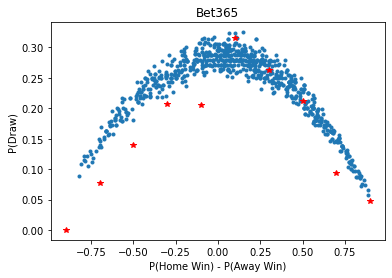

In [15]:
plt.plot(df_main['B365PrH_Norm'] - df_main['B365PrA_Norm'],df_main['B365PrD_Norm'], '.')
plt.xlabel('P(Home Win) - P(Away Win)')
plt.ylabel('P(Draw)')
plt.title('Bet365')
plt.plot(np.arange(-0.9,1.1,0.2),prob_actual_draw_365,'*',color='red')

For Bet365 bookmaker, there is no bias in odds clearly. 

BetAndWin

In [16]:
num_actual_baw = np.histogram(draw_matches['PrDifBW'], bins=np.arange(-1, 1.2, 0.2))[0]
##actual number of draw matches with bins 0.2
num_all_baw = np.histogram(df_main['PrDifBW'],bins=np.arange(-1,1.2,0.2))[0]
##Total number of matches with bins 0.2
for j in range(len(num_all_baw)):
    if num_all_baw[j]==0:
        num_all_baw[j]=1 #If there is no match in any bins, program will give error. 0/0 will transform to 0/1.
prob_actual_draw_baw = num_actual_baw /num_all_baw
prob_actual_draw_baw

array([0.        , 0.07692308, 0.14814815, 0.18681319, 0.19811321,
       0.31666667, 0.27536232, 0.18644068, 0.10465116, 0.0625    ])

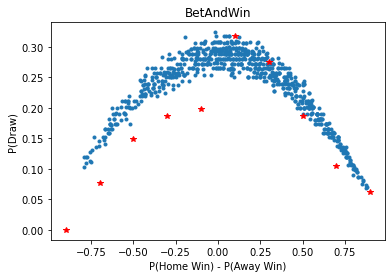

In [17]:
plt.plot(df_main['BWPrH_Norm'] - df_main['BWPrA_Norm'],df_main['BWPrD_Norm'], '.')
plt.xlabel('P(Home Win) - P(Away Win)')
plt.ylabel('P(Draw)')
plt.title('BetAndWin')
plt.plot(np.arange(-0.9,1.1,0.2),prob_actual_draw_baw,'*',color='red')

For BetandWin bookmaker, there is no bias in odds clearly. However, in bin 0-0.25 there may be slightly bias in odds in the long run.

Pinnacle

In [18]:
num_actual_pin = np.histogram(draw_matches['PrDifPS'], bins=np.arange(-1, 1.2, 0.2))[0]
##actual number of draw matches with bins 0.2
num_all_pin = np.histogram(df_main['PrDifPS'],bins=np.arange(-1,1.2,0.2))[0]
##Total number of matches with bins 0.2
for j in range(len(num_all_pin)):
    if num_all_pin[j]==0:
        num_all_pin[j]=1 #If there is no match in any bins, program will give error. 0/0 will transform to 0/1.
prob_actual_draw_pin = num_actual_pin /num_all_pin
prob_actual_draw_pin

array([0.        , 0.075     , 0.14814815, 0.1954023 , 0.2       ,
       0.32386364, 0.2481203 , 0.21848739, 0.10465116, 0.04545455])

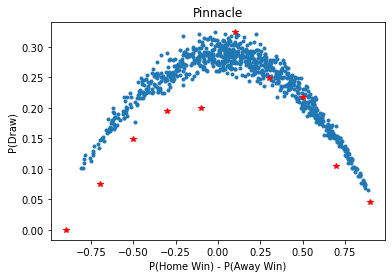

In [19]:
plt.plot(df_main['PSPrH_Norm'] - df_main['PSPrA_Norm'],df_main['PSPrD_Norm'], '.')
plt.xlabel('P(Home Win) - P(Away Win)')
plt.ylabel('P(Draw)')
plt.title('Pinnacle')
plt.plot(np.arange(-0.9,1.1,0.2),prob_actual_draw_pin,'*',color='red')

For pinnacle bookmaker, there is no bias in odds clearly. However, in bin 0-0.25 there may be slightly bias in odds in the long run.

WH

In [20]:
num_actual_wh = np.histogram(draw_matches['PrDifWH'], bins=np.arange(-1, 1.2, 0.2))[0]
##actual number of draw matches with bins 0.2
num_all_wh = np.histogram(df_main['PrDifWH'],bins=np.arange(-1,1.2,0.2))[0]
##Total number of matches with bins 0.2
for j in range(len(num_all_wh)):
    if num_all_wh[j]==0:
        num_all_wh[j]=1 #If there is no match in any bins, program will give error. 0/0 will transform to 0/1.
prob_actual_draw_wh = num_actual_wh /num_all_wh
prob_actual_draw_wh

array([0.        , 0.07894737, 0.1509434 , 0.18888889, 0.2       ,
       0.32105263, 0.25      , 0.20833333, 0.09756098, 0.04761905])

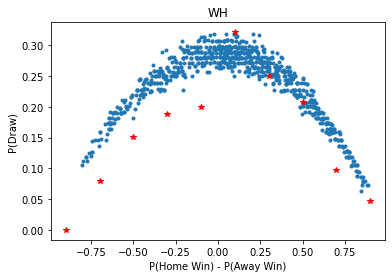

In [21]:
plt.plot(df_main['WHPrH_Norm'] - df_main['WHPrA_Norm'],df_main['WHPrD_Norm'], '.')
plt.xlabel('P(Home Win) - P(Away Win)')
plt.ylabel('P(Draw)')
plt.title('WH')
plt.plot(np.arange(-0.9,1.1,0.2),prob_actual_draw_wh,'*',color='red')

For WH bookmaker, there is no bias in odds clearly. However, in bin 0-0.25 there may be slightly bias in odds in the long run.

# TASK 3

In [22]:
newdf = df_main
newdf

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,PSPrH_Norm,PSPrA_Norm,PSPrD_Norm,WHPrH_Norm,WHPrA_Norm,WHPrD_Norm,PrDifB365,PrDifBW,PrDifPS,PrDifWH
0,E0,12/09/2020,Fulham,Arsenal,0,3,A,0,1,A,...,0.158364,0.625334,0.216302,0.147146,0.625129,0.227725,-0.463208,-0.431784,-0.466970,-0.477983
1,E0,12/09/2020,Crystal Palace,Southampton,1,0,H,1,0,H,...,0.294772,0.407768,0.297460,0.297468,0.405063,0.297468,-0.094430,-0.070996,-0.112996,-0.107595
2,E0,12/09/2020,Liverpool,Leeds,4,3,H,3,2,H,...,0.745347,0.098428,0.156225,0.747012,0.094871,0.158118,0.641853,0.665860,0.646919,0.652141
3,E0,12/09/2020,West Ham,Newcastle,0,2,A,0,0,D,...,0.449088,0.279718,0.271194,0.445109,0.281466,0.273424,0.162338,0.162338,0.169370,0.163643
4,E0,13/09/2020,West Brom,Leicester,0,3,A,0,0,D,...,0.243060,0.486121,0.270819,0.249733,0.486660,0.263607,-0.236926,-0.219198,-0.243060,-0.236926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,E0,12/05/2019,Liverpool,Wolves,2,0,H,1,0,H,...,0.740015,0.091975,0.168010,0.739744,0.086752,0.173504,0.660613,0.633311,0.648039,0.652993
824,E0,12/05/2019,Man United,Cardiff,0,2,A,0,1,A,...,0.753251,0.094433,0.152316,0.759124,0.094891,0.145985,0.672843,0.674740,0.658818,0.664234
825,E0,12/05/2019,Southampton,Huddersfield,1,1,D,1,0,H,...,0.672444,0.127076,0.200480,0.680394,0.119069,0.200537,0.564040,0.537953,0.545368,0.561325
826,E0,12/05/2019,Tottenham,Everton,2,2,D,1,0,H,...,0.464286,0.267857,0.267857,0.454545,0.272727,0.272727,0.164557,0.181818,0.196429,0.181818


In [23]:
indexNumber = newdf[ (newdf['HR'] >= 1) | (newdf['AR'] >= 1) ].index #finding index of matches at least one red card.

In [24]:
print(len(indexNumber)) #97 games


97


In [25]:
newdf.drop(indexNumber, inplace = True) #data is ready after deleting specific rows.

Task 3.2.3

In [26]:
new_draw_matches = newdf[newdf.FTHG == newdf.FTAG ]
new_draw_matches = new_draw_matches.reset_index(drop=True)

In [27]:
## probabilities of 4 chosen bookmakers are added in one column as a vector.
new_combined_draw = pd.concat([new_draw_matches['PrDifB365'],new_draw_matches['PrDifBW'],new_draw_matches['PrDifPS'],new_draw_matches['PrDifWH']],ignore_index=True)
new_combined_draw_df = pd.DataFrame({'ProbDif': new_combined_draw})

new_combined_all_dif = pd.concat([newdf['PrDifB365'],newdf['PrDifBW'],newdf['PrDifPS'],newdf['PrDifWH']],ignore_index=True)
new_combined_all_draw = pd.concat([newdf['B365PrD_Norm'],newdf['BWPrD_Norm'],newdf['PSPrD_Norm'],newdf['WHPrD_Norm']],ignore_index=True)
new_combined_all_df = pd.DataFrame({'ProbDif': new_combined_all_dif, 'ProbDraw': new_combined_all_draw})

In [28]:
new_num_combined_all = np.histogram(new_combined_all_df['ProbDif'], bins=np.arange(-1, 1.2, 0.2))[0]
new_num_combined_actual = np.histogram(new_combined_draw_df['ProbDif'], bins=np.arange(-1, 1.2, 0.2))[0]
#new_num_combined_all shows that all matches with respect to bins
#new_num_combined_actual shows that matches which are ended as draw with respect to bins
for j in range(len(new_num_combined_all)):
    if new_num_combined_all[j]==0:
        new_num_combined_all[j]=1 #If there is no match in any bins, program will give error. 0/0 will transform to 0/1.
new_prob_com_act_draw = new_num_combined_actual / new_num_combined_all

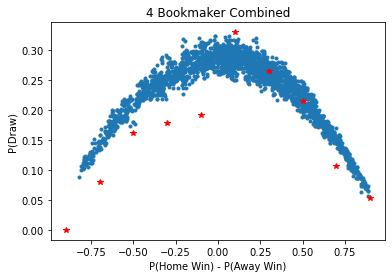

In [29]:
plt.plot(new_combined_all_df['ProbDif'],new_combined_all_df['ProbDraw'], '.')
plt.xlabel('P(Home Win) - P(Away Win)')
plt.ylabel('P(Draw)')
plt.title('4 Bookmaker Combined')
plt.plot(np.arange(-0.9,1.1,0.2),new_prob_com_act_draw,'*',color='red')

Task 3.2.4

Bet 365

In [30]:
new_num_actual_365 = np.histogram(new_draw_matches['PrDifB365'], bins=np.arange(-1, 1.2, 0.2))[0]
##actual number of draw matches with bins 0.2
new_num_all_365 = np.histogram(newdf['PrDifB365'],bins=np.arange(-1,1.2,0.2))[0]
##Total number of matches with bins 0.2
for j in range(len(new_num_all_365)):
    if new_num_all_365[j]==0:
        new_num_all_365[j]=1 #If there is no match in any bins, program will give error. 0/0 will transform to 0/1.
new_prob_actual_draw_365 = new_num_actual_365 /new_num_all_365
new_prob_actual_draw_365

array([0.        , 0.08108108, 0.15384615, 0.19178082, 0.19318182,
       0.33098592, 0.26446281, 0.22222222, 0.10126582, 0.05      ])

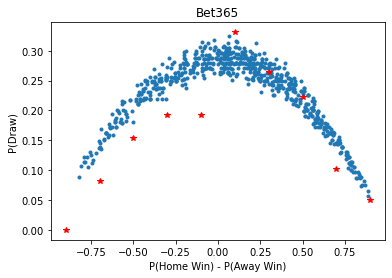

In [31]:
plt.plot(newdf['B365PrH_Norm'] - newdf['B365PrA_Norm'], newdf['B365PrD_Norm'], '.')
plt.xlabel('P(Home Win) - P(Away Win)')
plt.ylabel('P(Draw)')
plt.title('Bet365')
plt.plot(np.arange(-0.9,1.1,0.2),new_prob_actual_draw_365,'*',color='red')

BetAndWin

In [32]:
new_num_actual_baw = np.histogram(new_draw_matches['PrDifBW'], bins=np.arange(-1, 1.2, 0.2))[0]
##actual number of draw matches with bins 0.2
new_num_all_baw = np.histogram(newdf['PrDifBW'],bins=np.arange(-1,1.2,0.2))[0]
##Total number of matches with bins 0.2
for j in range(len(new_num_all_baw)):
    if new_num_all_baw[j]==0:
        new_num_all_baw[j]=1 #If there is no match in any bins, program will give error. 0/0 will transform to 0/1.
new_prob_actual_draw_baw = new_num_actual_baw /new_num_all_baw
new_prob_actual_draw_baw

array([0.        , 0.07894737, 0.16666667, 0.17073171, 0.19047619,
       0.32638889, 0.28346457, 0.19469027, 0.1125    , 0.06666667])

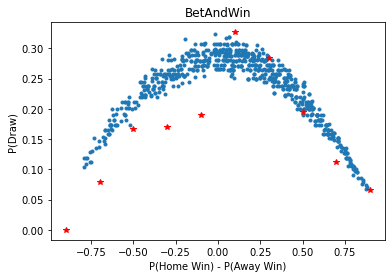

In [33]:
plt.plot(newdf['BWPrH_Norm'] - newdf['BWPrA_Norm'],newdf['BWPrD_Norm'], '.')
plt.xlabel('P(Home Win) - P(Away Win)')
plt.ylabel('P(Draw)')
plt.title('BetAndWin')
plt.plot(np.arange(-0.9,1.1,0.2),new_prob_actual_draw_baw,'*',color='red')

Pinnacle

In [34]:
new_num_actual_pin = np.histogram(new_draw_matches['PrDifPS'], bins=np.arange(-1, 1.2, 0.2))[0]
##actual number of draw matches with bins 0.2
new_num_all_pin = np.histogram(newdf['PrDifPS'],bins=np.arange(-1,1.2,0.2))[0]
##Total number of matches with bins 0.2
for j in range(len(new_num_all_pin)):
    if new_num_all_pin[j]==0:
        new_num_all_pin[j]=1 #If there is no match in any bins, program will give error. 0/0 will transform to 0/1.
new_prob_actual_draw_pin = new_num_actual_pin /new_num_all_pin
new_prob_actual_draw_pin

array([0.        , 0.07894737, 0.16326531, 0.17948718, 0.19318182,
       0.33333333, 0.25619835, 0.22807018, 0.1125    , 0.04761905])

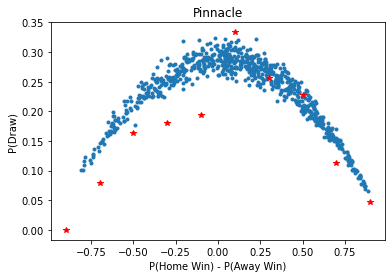

In [35]:
plt.plot(newdf['PSPrH_Norm'] - newdf['PSPrA_Norm'],newdf['PSPrD_Norm'], '.')
plt.xlabel('P(Home Win) - P(Away Win)')
plt.ylabel('P(Draw)')
plt.title('Pinnacle')
plt.plot(np.arange(-0.9,1.1,0.2),new_prob_actual_draw_pin,'*',color='red')

WH

In [36]:
new_num_actual_wh = np.histogram(new_draw_matches['PrDifWH'], bins=np.arange(-1, 1.2, 0.2))[0]
##actual number of draw matches with bins 0.2
new_num_all_wh = np.histogram(newdf['PrDifWH'],bins=np.arange(-1,1.2,0.2))[0]
##Total number of matches with bins 0.2
for j in range(len(new_num_all_wh)):
    if new_num_all_wh[j]==0:
        new_num_all_wh[j]=1 #If there is no match in any bins, program will give error. 0/0 will transform to 0/1.
new_prob_actual_draw_wh = new_num_actual_wh /new_num_all_wh
new_prob_actual_draw_wh

array([0.        , 0.08333333, 0.16666667, 0.17283951, 0.19277108,
       0.33116883, 0.25641026, 0.21929825, 0.1038961 , 0.05      ])

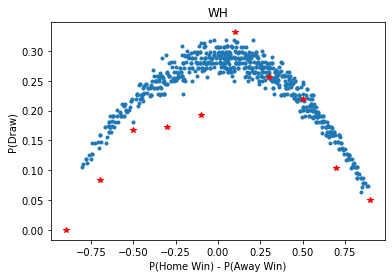

In [37]:
plt.plot(newdf['WHPrH_Norm'] - newdf['WHPrA_Norm'],newdf['WHPrD_Norm'], '.')
plt.xlabel('P(Home Win) - P(Away Win)')
plt.ylabel('P(Draw)')
plt.title('WH')
plt.plot(np.arange(-0.9,1.1,0.2),new_prob_actual_draw_wh,'*',color='red')

After removing matches in which at least one red card exist, bias in the bin 0.00-0.25 can be considered for all bookmakers.